In [51]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
def cv2_imshow(img):
    if(len(img.shape) > 2):
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_img)
    else:
        plt.imshow(img)

### 1. Read an image in the given link as ‘aaa.png’. Use the dilation operation on this image with two different structuring elements (square and circle). This size of structuring element is of your choice. Save your results as result-1.png andresult-2.png. Compare and contrast your results. Explain your observations.

In [301]:
img = cv2.imread('aaa.png')

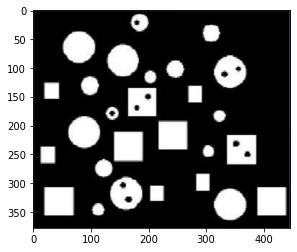

In [302]:
cv2_imshow(img)

In [303]:
img.shape

(378, 447, 3)

In [304]:
structuring_element_square = np.ones((9, 9), np.uint8)
structuring_element_circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

In [305]:
structuring_element_square

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

In [306]:
structuring_element_circle

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

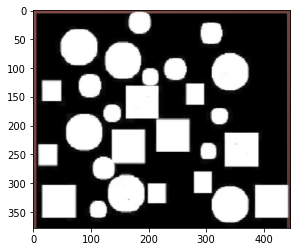

In [307]:
dilated_square_img = cv2.dilate(img, structuring_element_square, iterations = 1)
plt.imshow(dilated_square_img)

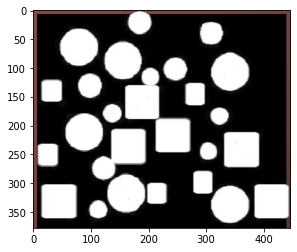

In [308]:
dilated_circle_img = cv2.dilate(img, structuring_element_circle, iterations = 1)
plt.imshow(dilated_circle_img)

In [315]:
!mkdir assignment-2
%cd assignment-2
!mkdir question-1
%cd ..

cv2.imwrite('./assignment-2/question-1/result-1.png', dilated_square_img)
cv2.imwrite('./assignment-2/question-1/result-2.png', dilated_circle_img)

D:\__Program Files\__Image-Processing\assignment-2


A subdirectory or file assignment-2 already exists.


D:\__Program Files\__Image-Processing


True

<b>Comparison:</b>
- Both the circle and square structuring elements were able to fill the holes by dilation.
- The edges of the shapes in the image were dilated (smoothened) giving a polished output image.


<b>Contrast :</b>
- The number of ones in the square structuring element is more than that in a circle strucuring element for a strucuturing element of size nxn.
- The circle structuring element required larger dimensions than the square structuring element to remove the holes.

<b>Observations</b>
Both the structuring elements (square and circle) were able to fill the holes in the original image after dilation. The square structuring element with a size 9x9 was able to remove the holes as whereas the circle structuring element required a structuring element of size 11x11 to completely remove the holes.

- Square dilation expands objects more uniformly in all directions due to its sharp corners.
- Circular dilation has a smoother effect on edges, potentially preserving some diagonal details due to its rounded shape.

### 2. Read an image. Add salt/pepper noise to it. Use a suitable structuring element to dilate this image, hence removing the noise from the image. Save your image as denoised.png.

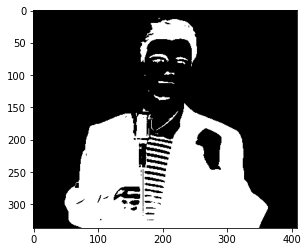

In [228]:
img = cv2.imread('./bw_image.png')
cv2_imshow(img)

In [229]:
# Adding salt/pepper noise to image
salt_pepper_noise_mask = np.random.choice([0, 1, -1], size = img.shape[:2], p = [0.1, 0.1, 0.8])

In [230]:
salt_pepper_noise_mask

array([[-1, -1,  1, ..., -1, -1, -1],
       [ 0, -1, -1, ..., -1,  0, -1],
       [-1, -1, -1, ..., -1, -1,  0],
       ...,
       [-1, -1, -1, ..., -1,  1,  0],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1,  1, -1, ..., -1, -1, -1]])

In [231]:
img_noisy = img.copy()
img_noisy[salt_pepper_noise_mask == 0] = 0
img_noisy[salt_pepper_noise_mask == 1] = 255

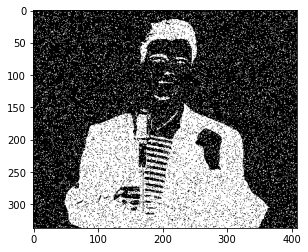

In [232]:
cv2_imshow(img_noisy)

In [233]:
structuring_element = np.ones((3, 1)).astype(np.uint8)

In [234]:
denoised_img = cv2.dilate(img_noisy, structuring_element, iterations = 1)

##### After applying dilation, pepper noise is removed from the noisy image

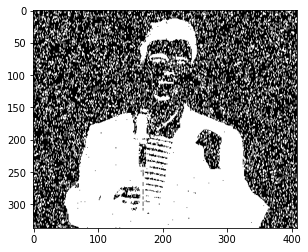

In [235]:
cv2_imshow(denoised_img)

In [238]:
%cd assignment-2
%mkdir question-2
%cd ..

cv2.imwrite('./assignment-2/question-2/denoised.png', denoised_img)

True

### 3. Show with an example image how you perform edge detection using dilation.

In [317]:
img = cv2.imread('image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# eroded = cv2.erode(img, kernel, iterations = 1)
dilated = cv2.dilate(img, kernel, iterations = 1)


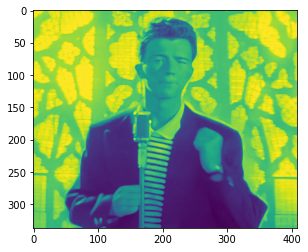

In [318]:
cv2_imshow(dilated)

In [319]:
edges = dilated - img

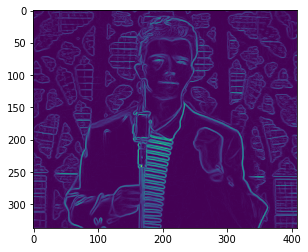

In [320]:
cv2_imshow(edges)

In [289]:
cv2.imshow('Edges', edges)
cv2.waitKey()
cv2.destroyAllWindows()

In [321]:
%cd assignment-2
%mkdir question-3
%cd ..

cv2.imwrite('./assignment-2/question-3/edges.png', edges)

D:\__Program Files\__Image-Processing\assignment-2
D:\__Program Files\__Image-Processing


True

### 4. Read an image ‘aaa.png’. Use the erosion operation on this image with two different structuring elements (square and circle). This size of structuring element is of your choice. Save your results as result-1.png and result-2.png. Compare and contrast your results. Explain your observations.

In [323]:
img = cv2.imread('aaa.png')

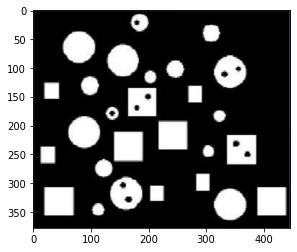

In [324]:
cv2_imshow(img)

In [331]:
structuring_element_square = np.ones((7, 7))
structuring_element_circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

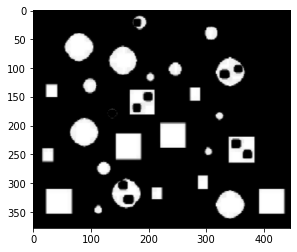

In [332]:
eroded_square = cv2.erode(img, structuring_element_square)
cv2_imshow(eroded_square)

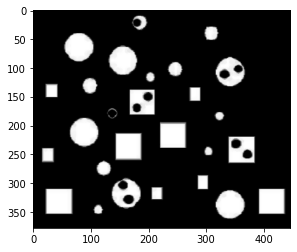

In [327]:
eroded_circle = cv2.erode(img, structuring_element_circle)
cv2_imshow(eroded_circle)

In [328]:
%cd assignment-2
%mkdir question-4
%cd ..

cv2.imwrite('./assignment-2/question-4/result-1.png', eroded_square)
cv2.imwrite('./assignment-2/question-4/result-2.png', eroded_circle)

D:\__Program Files\__Image-Processing\assignment-2
D:\__Program Files\__Image-Processing


True

<b>Comparison:</b>
- Both the circle and square structuring elements were able to widen the holes (thin the object) by erosion.
- The edges of the shapes in the image were eroded (thinned).


<b>Contrast :</b>
- The number of ones in the square structuring element is more than that in a circle strucuring element for a strucuturing element of size nxn.

<b>Observations</b>
Both the structuring elements (square and circle) were able to widen the holes in the original image after erosion.

- Square erosion shrinks objects more uniformly in all directions due to its sharp corners.
- Circular erosion has a smoother effect on edges, potentially preserving some diagonal details due to its rounded shape.

### 5. Read an image. Add salt/pepper noise to it. Use a suitable structuring element to erode this image, hence removing the salt noise from the image. Save your image as denoised.png.

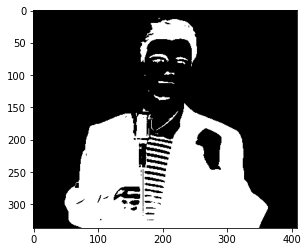

In [246]:
img = cv2.imread('bw_image.png')
cv2_imshow(img)

In [247]:
salt_pepper_noise_mask = np.random.choice([0, 1, -1], size = img.shape[:2], p = [0.1, 0.1, 0.8])

In [248]:
noisy_img = img.copy()
noisy_img[salt_pepper_noise_mask == 0] = 0
noisy_img[salt_pepper_noise_mask == 1] = 255

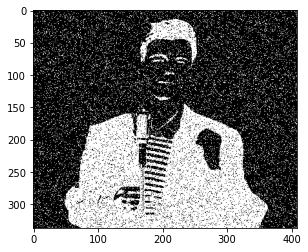

In [249]:
cv2_imshow(noisy_img)

In [250]:
structuring_element = np.ones((2, 2)).astype(np.uint8)
# structuring_element = np.identity(2).astype(np.uint8)
# structuring_element = np.ones((3, 1)).astype(np.uint8)
structuring_element

array([[1, 1],
       [1, 1]], dtype=uint8)

In [251]:
denoised_img = cv2.erode(noisy_img, structuring_element)

##### After removing salt noise using erosion operation

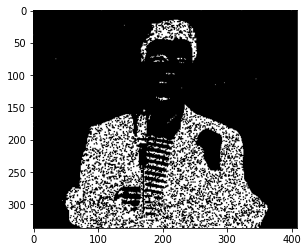

In [252]:
cv2_imshow(denoised_img)

In [253]:
%cd assignment-2
%mkdir question-5
%cd ..

cv2.imwrite('./assignment-2/question-5/denoised.png', denoised_img)

True

### 6. Use the opening technique on the image available at the following link with the appropriate structuring element.to separate the circles from the lines. Save your image as circle.png and line.png. The circle_png image should contain only circles, and the line.png image should contain only lines. Show the structuring element used. Experiment with many structuring elements, describe your results and observations.

In [417]:
img = cv2.imread('./circles-and-lines.jpg')

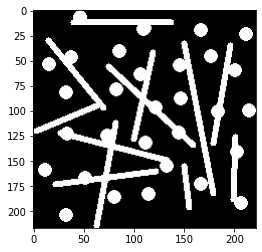

In [418]:
cv2_imshow(img)

In [425]:
def open_morph(img, se):
    eroded = cv2.erode(img, se)
    opened = cv2.dilate(eroded, se)
    
    return opened

#### Only Circles

In [427]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
se

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

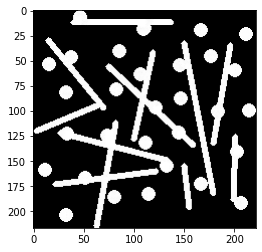

In [428]:
opened = open_morph(img, se)
cv2_imshow(opened)

In [429]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
se

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

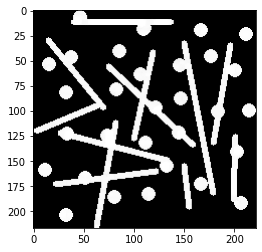

In [430]:
opened = open_morph(img, se)
cv2_imshow(opened)

In [431]:
se = np.ones((5, 5))
se

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

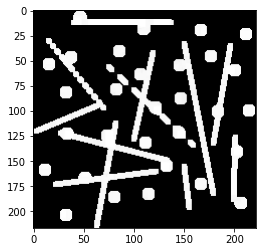

In [432]:
opened = open_morph(img, se)
cv2_imshow(opened)

In [433]:
se = np.ones((7, 7))
se

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

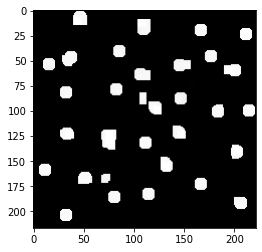

In [434]:
opened = open_morph(img, se)
cv2_imshow(opened)

##### Structuring Element that manages to preserve only the circles

In [441]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
se

array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

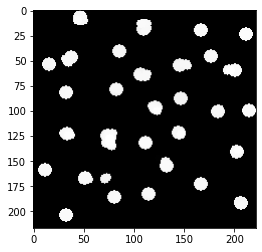

In [442]:
opened = open_morph(img, se)
cv2_imshow(opened)

In [443]:
%cd assignment-2
%mkdir question-6
%cd ..

cv2.imwrite('./assignment-2/question-6/circle.png', opened)

D:\__Program Files\__Image-Processing\assignment-2
D:\__Program Files\__Image-Processing


True

#### Only Lines

In [445]:
se = np.ones((3, 1)).astype(np.uint8)
se

array([[1],
       [1],
       [1]], dtype=uint8)

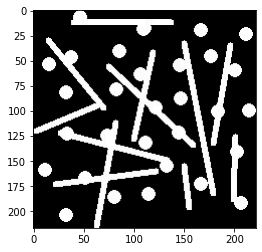

In [446]:
opened = open_morph(img, se)
cv2_imshow(opened)

In [458]:
se = np.ones((20, 1)).astype(np.uint8)
se

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

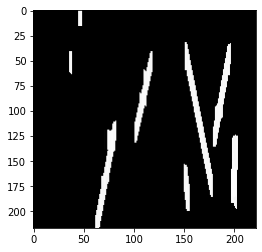

In [459]:
opened = open_morph(img, se)
cv2_imshow(opened)

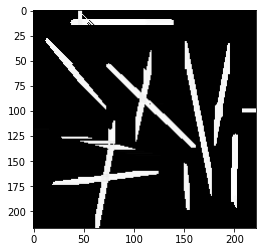

In [497]:
n = 25

se_1 = np.ones((1, n))
se_2 = np.ones((n, 1))
se_3 = np.identity(n).astype(np.uint8)
se_4 = np.identity(n).astype(np.uint8)[::-1, :]

opened = open_morph(img, se_1) + open_morph(img, se_2) + open_morph(img, se_3) + open_morph(img, se_4)
cv2_imshow(opened)

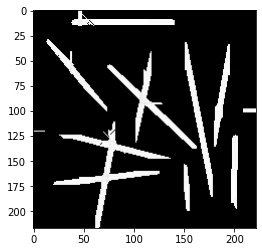

In [511]:
n = 23

se_1 = np.ones((1, n))
se_2 = np.ones((n, 1))
se_3 = np.identity(n).astype(np.uint8)
se_4 = np.identity(n).astype(np.uint8)[::-1, :]

opened = open_morph(img, se_1) + open_morph(img, se_2) + open_morph(img, se_3) + open_morph(img, se_4)
cv2_imshow(opened)

In [519]:
cv2.imwrite('./assignment-2/question-6/line.png', opened)

True

##### Structuring Elements Used

In [512]:
se_1

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]])

In [513]:
se_2

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [514]:
se_3

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

In [516]:
se_4

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

### Observations
- The opening operation is a morphological operation that involves eroding the original image with a structuring element and following that with a dilation of the eroded image with the same structuring element.
- Opening operation removes portions of the object that do not contain the structuring element.
- This property is used to come up with an appropriate structuring element for the tasks of removing circles and lines.
- Preserving circles necessitates a structural element that approximates a circle and preserving lines similarly requires a structuring element that approximates a line.
- In doing so we observe that the desired entities are preserved in the opened image and the other features are removed.

### Results:
#### The following structuring elements were able to achieve the task:

<b> Preserving Circles:</b>

    array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)
    
    
<b>Preserving Lines:</b>
     
   ##### Vertical Lines:
         array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])
     
   ##### Horizontal Lines:
     array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]])
     
   ###### Negative Slope Lines:
     array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
      dtype=uint8)
     
     
   ##### Positive Slope Lines:
     array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=uint8)

### 7. Demonstrate Closing operation with any image of your choice and record your observations.

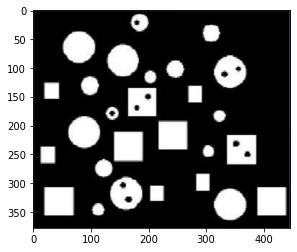

In [550]:
img = cv2.imread('./aaa.png')
cv2_imshow(img)

In [554]:
%cd assignment-2
%mkdir question-7
%cd ..

D:\__Program Files\__Image-Processing\assignment-2
D:\__Program Files\__Image-Processing


In [555]:
def close_morph(img, se):
    dilated = cv2.dilate(img, se)
    closed = cv2.erode(dilated, se)
    
    return closed

In [556]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
se

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

True

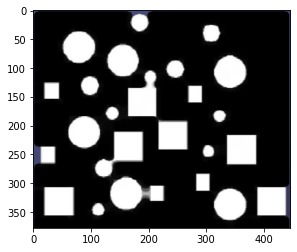

In [557]:
closed = close_morph(img, se)
cv2_imshow(closed)
cv2.imwrite('./assignment-2/question-7/closed.png', closed)

#### Observations:
- The closing morphological operation consists of initially dilating a source image with a structuring element followed by erosion of the dilated image by the same structuring element.
- It fills holes/gaps that are smaller than the size of the structuring element.
- In addition it also smoothes the contours and edges and joins narrow breaks.

In the above results, the holes are filled, small gaps between the circle and square entities are bridged and the contours of all entities are smoother overall.